Задачи
Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
Сколько транзакций завершились ошибкой?
Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.
Описание данных
Имеются следующие данные:

date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
name – имя пользователя
transaction – статус транзакции
minute* – сколько минут прошло с начала дня

Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Вопрос: сколько в датасете пропущенных значений?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
transaction_data = pd.read_csv('/home/jupyter-a.komova-13/lesson_5/transaction_data.csv')

In [3]:
transaction_data

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [4]:
transaction_data.shape

(5315, 3)

In [5]:
transaction_data.dtypes

date           object
name           object
transaction    object
dtype: object

In [6]:
transaction_data.isna()

,date,name,transaction
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
5310,False,False,False
5311,False,False,False
5312,False,False,False
5313,False,False,False


In [7]:
transaction_data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [8]:
transaction_data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

In [9]:
transaction_data.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [10]:
transaction_types = transaction_data.groupby('transaction', as_index = False) \
    .agg({'name' : 'count'}) \
    .sort_values('name', ascending = False)

In [11]:
transaction_types

,transaction,name
2,successfull,3692
0,cancelled,1619
1,error,4


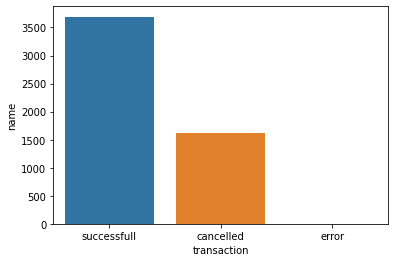

In [12]:
ax = sns.barplot(x="transaction", y="name", data=transaction_types)

In [13]:
# Хорош ли полученный график?
# Нет, т.к.плохо видно число наблюдений у некоторых значений (error)

Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

по оси x – число транзакций
по оси y – доля пользователей с таким числом транзакций

In [14]:
transaction_name = transaction_data.query('transaction == "successfull"') \
    .groupby('name', as_index = False) \
    .agg({'transaction' : 'count'}) \
    .sort_values('transaction', ascending = False)

In [15]:
transaction_name

,name,transaction
48,Svetlana_Smirnova,82
41,Olga_Smirnova,80
31,Masha_Ozerova,80
43,Svetlana_Ivanova,79
47,Svetlana_Polyanova,78
33,Masha_Polyanova,78
6,Ekaterina_Smirnova,77
22,Lolita_Ivanova,76
9,Irina_Lesnova,76
10,Irina_Ozerova,76


In [16]:
transaction_name.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


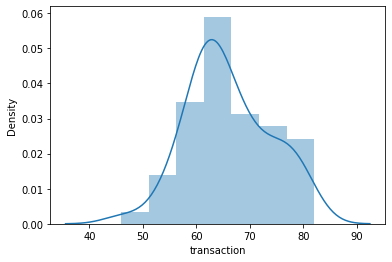

In [17]:
sns.distplot(transaction_name.transaction)

К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

столбцы – имена пользователей
строки – минута времени осуществления операции (minute)
значения – число совершённых операций
Пропущенные значения заполните нулями.

Note: фильтровать успешные транзакции не нужно - постройте табличку по всем

In [18]:
transaction_data_updated = pd.read_csv('/home/jupyter-a.komova-13/lesson_5/transaction_data_updated.csv')

In [19]:
transaction_data_updated

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [20]:
user_vs_minute_pivot = transaction_data_updated.groupby(['name', 'minute'], as_index = False) \
    .agg({'transaction' : 'count'}) \
    .pivot(index = 'minute', columns = 'name', values='transaction') \
    .reset_index() \
    .fillna(0)

In [21]:
user_vs_minute_pivot

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0
9,9,2.0,4.0,2.0,3.0,4.0,0.0,3.0,2.0,2.0,...,2.0,3.0,1.0,2.0,4.0,2.0,3.0,0.0,1.0,4.0


In [22]:
user_vs_minute_pivot = transaction_data_updated.groupby(['name', 'minute'], as_index = False) \
    .agg({'transaction' : 'count'}) \
    .pivot(index = 'minute', columns = 'name', values='transaction') \
    .fillna(0)

In [23]:
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


Посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).
Например:

date                name               transaction  minute  true_minute
2020-03-02 00:37:20 Ekaterina_Petrova  cancelled    37      37
2020-03-02 01:06:14 Ekaterina_Smirnova successfull  6       66

In [24]:
transaction_data_updated

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [25]:
transaction_data_updated['date'] = pd.to_datetime(transaction_data_updated['date'])

In [26]:
transaction_data_updated.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [27]:
transaction_data_updated.date.dt.minute

0       37
1       59
2        6
3        2
4       17
        ..
5310     9
5311    46
5312    16
5313    13
5314    15
Name: date, Length: 5315, dtype: int64

In [28]:
transaction_data_updated['minutes1'] = transaction_data_updated.date.dt.minute

In [29]:
transaction_data_updated['minutes2'] = transaction_data_updated.date.dt.hour * 60

In [30]:
transaction_data_updated['minutes_sum'] = transaction_data_updated.minutes1 + transaction_data_updated.minutes2

In [31]:
transaction_data_updated['true_minute'] = transaction_data_updated.date.dt.minute + transaction_data_updated.date.dt.hour * 60

In [32]:
transaction_data_updated

,date,name,transaction,minute,minutes1,minutes2,minutes_sum,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37,0,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59,0,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,6,60,66,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2,0,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17,0,17,17
...,...,...,...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9,0,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46,0,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16,0,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13,0,13,13


In [33]:
user_vs_minute_pivot = transaction_data_updated.groupby(['minutes_sum', 'name'], as_index = False) \
    .agg({'transaction' : 'count'}) \
    .pivot(index = 'minutes_sum', columns = 'name', values='transaction') \
    .fillna(0)

In [34]:
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minutes_sum,,,,,,,,,,,,,,,,,,,,,
0,1.0,3.0,0.0,1.0,3.0,3.0,2.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,2.0,1.0,3.0,0.0,0.0,1.0
1,1.0,4.0,0.0,3.0,2.0,1.0,3.0,1.0,2.0,0.0,...,2.0,4.0,3.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0
2,1.0,1.0,2.0,3.0,1.0,0.0,2.0,1.0,1.0,2.0,...,2.0,0.0,2.0,3.0,0.0,0.0,1.0,1.0,3.0,1.0
3,2.0,0.0,1.0,0.0,3.0,1.0,1.0,2.0,1.0,1.0,...,0.0,2.0,2.0,0.0,4.0,0.0,1.0,2.0,1.0,0.0
4,2.0,0.0,0.0,2.0,1.0,1.0,1.0,3.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,4.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,2.0,2.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,1.0
86,0.0,1.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0
87,3.0,1.0,0.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,...,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0


In [35]:
df = transaction_data_updated.groupby(['minutes_sum'], as_index = False) \
    .agg({'transaction' : 'count'}) \

In [36]:
df

,minutes_sum,transaction
0,0,64
1,1,77
2,2,68
3,3,65
4,4,57
...,...,...
85,85,68
86,86,52
87,87,59
88,88,62


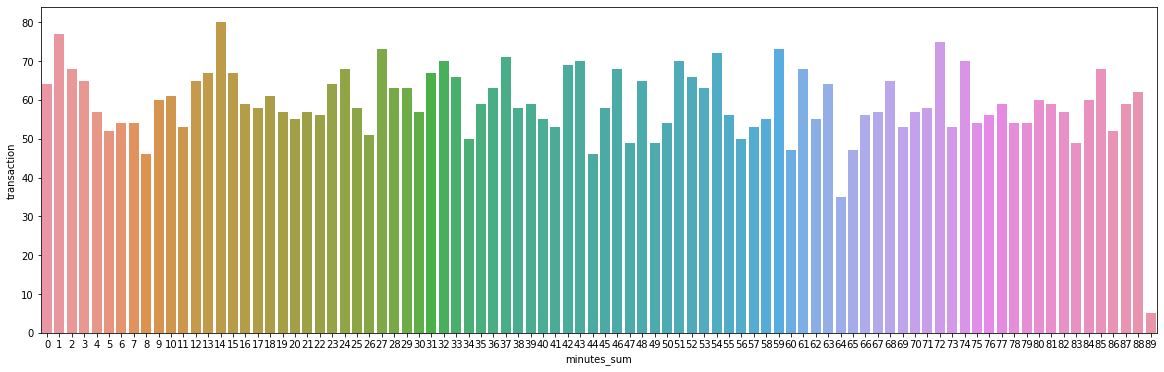

In [37]:
plt.figure(figsize=[20,6])

ax = sns.barplot(x='minutes_sum', y='transaction', data=df)